<a href="https://colab.research.google.com/github/ianlucasalmeida/Atividades_Fundamentos-2023.1/blob/main/ProjetoAssisido_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
print(x_train_raw[0])
print(y_train_raw[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [ ]:
#convertendo rótulos em variáveis.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train_raw[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


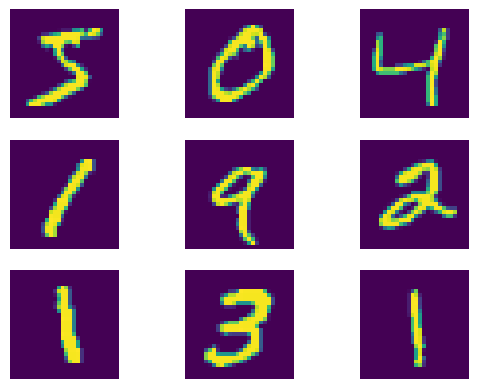

In [ ]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [ ]:
from re import X
#conversão de uma matriz (imagem) de 28 x 28 pra um vetor de 784 sem perder informação
X_train = x_train_raw.reshape(x_train_raw.shape[0], 784)
X_test = x_test_raw.reshape(x_test_raw.shape[0], 784)
#normalizar os valores dos pixels
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
#X_test = X_test.astype('float32')

In [ ]:
#criar um modelo de rede neural profunda (DNN) com três camadas totalmente
#conectadas
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=784),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = optimizers.Adam(0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#AJUSTE OS DADOS DE TREINAMENTO AO MODELO E CHAME O METODO FIT PARA TREINAR!
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

NameError: name 'x_train' is not defined

In [ ]:
#AJUSTE OS DADOS DE TREINAMENTO AO MODELO E CHAME O METODO FIT PARA TREINAR!
model.fit(X_train, y_train, # Use X_train instead of x_train
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8711 - loss: 0.4337
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0879
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0507
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9884 - loss: 0.0361
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0292
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0254
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0214
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0183
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0170
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0120


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08382211625576019
Test accuracy: 0.9801999926567078


In [ ]:
save('./model/final_DNN_model.h5')

'' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
#Criar um modelo de rede neural convolucional (CNN)
model = keras.Sequential()
#camada de entrada
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add

#Segunda camada convolucional
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1),
                              padding='same',
                              activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'))

#Adicionar camada de dropout para tentar evitar o overfitting
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
#Flattening
#Camada totalmente conectada
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
#Camada de saída
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,282 (399.54 KB)

 Trainable params: 102,282 (399.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train = x_train_raw.reshape(x_train_raw.shape[0], 28, 28, 1)
x_test = x_test_raw.reshape(x_test_raw.shape[0], 28, 28, 1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_raw, epochs=10 ) # Use y_train_raw instead of y_train

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7375 - loss: 1.0245
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9691 - loss: 0.1193
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9774 - loss: 0.0835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0701
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9838 - loss: 0.0589
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0592
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0522
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9875 - loss: 0.0444
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0433
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0477


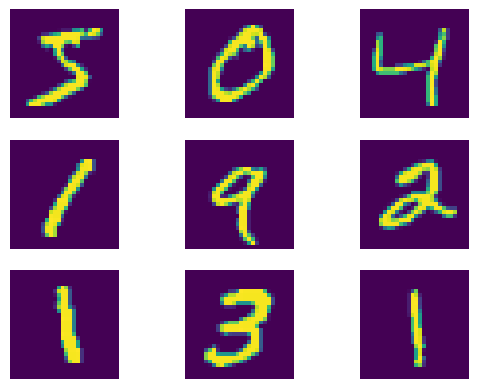

In [ ]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

KeyError: 'val_loss'

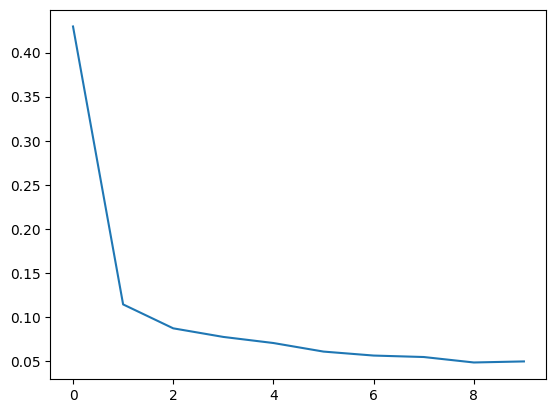

In [ ]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='test/validation loss')
plt.legend()
plt.show()

In [ ]:
# In the cell where you call model.fit (ipython-input-14-1cf019427b61),
# add a validation_split argument:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_raw, epochs=10, validation_split=0.2) # Add validation_split

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9890 - loss: 0.0442 - val_accuracy: 0.9911 - val_loss: 0.0338
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0453 - val_accuracy: 0.9917 - val_loss: 0.0314
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0387 - val_accuracy: 0.9932 - val_loss: 0.0348
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0315 - val_accuracy: 0.9929 - val_loss: 0.0317
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0299 - val_accuracy: 0.9930 - val_loss: 0.0338
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0338 - val_accuracy: 0.9911 - val_loss: 0.0318
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9914 - loss: 0.0319 - val_accuracy: 0.9929 - val_loss: 0.0345
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0257 -

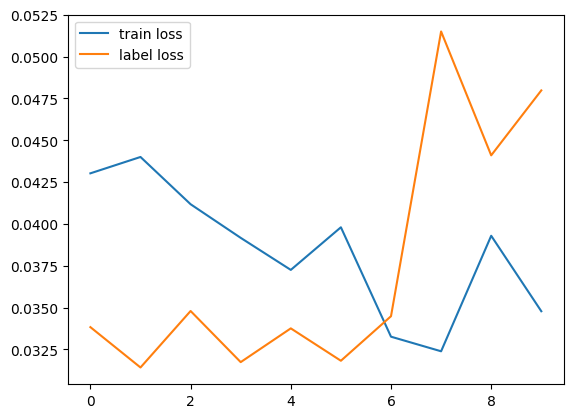

In [ ]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='label loss')
plt.legend()
plt.show()

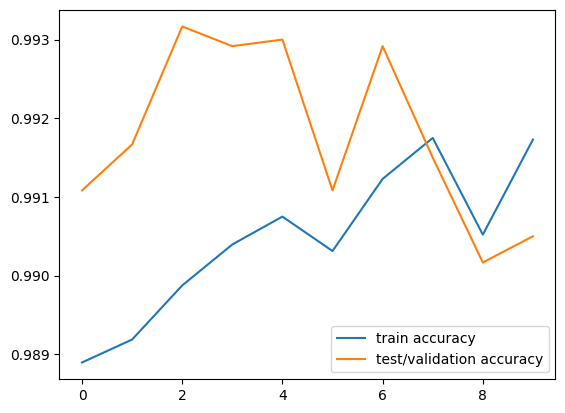

In [ ]:
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

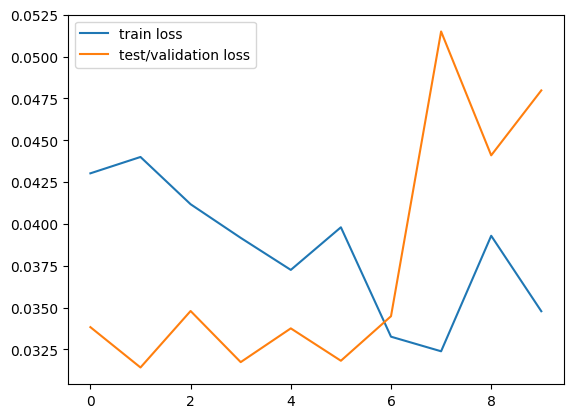

In [ ]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='test/validation loss')
plt.legend()
plt.show()

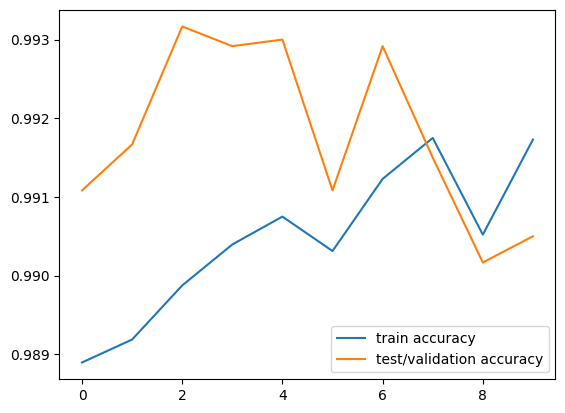

In [ ]:
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

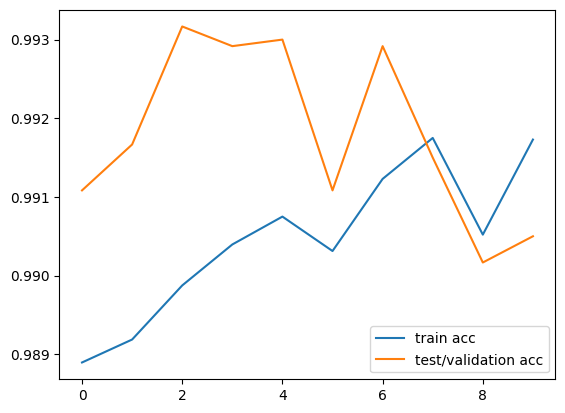

In [ ]:
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='test/validation acc')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_raw)
print('Test accuracy:', test_acc)
print('Acurancia do teste da CNN: %.2f'%test_acc)
print('Perda do teste da CNN: %.2f'%test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9868 - loss: 0.0673
Test accuracy: 0.9898999929428101
Acurancia do teste da CNN: 0.99
Perda do teste da CNN: 0.05


In [ ]:
model.save('./model/final_CNN_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./model/final_CNN_model.h5')
new_model = summary()

TypeError: Error when deserializing class 'Dense' using config={'name': 'dense_5', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax # Import the softmax activation

# Define a dictionary of custom objects
custom_objects = {'softmax_v2': softmax}

model = load_model('./model/final_CNN_model.h5', custom_objects=custom_objects)
new_model = model.summary() # Call summary on the model object

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,284 (399.55 KB)

 Trainable params: 102,282 (399.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Visualize os resultados da saída do conjunto de testes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def res_visual(n):
  #Faça predição no conjunto de testes new_model
  #print(final_opt_a)
  fig, ax = plt.subplots(nrows=int(n/5), ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:')
  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5)==0:
      print('\t')
  #Visualizando as imagens:
  img = x_test[i].reshape(28,28)
  ax[i].imshow(img, cmap='Greys', interpolation='nearest')
  plt.tight_layout('off')
  print('Primeias 20 imagens do conjunto de teste')
  plt.show()
res_visual(20)
  '''for i in range(n):
    ax[i].imshow(x_test_raw[i], cmap='Greys')
'''

IndentationError: unexpected indent (<ipython-input-28-62502b4558e9>, line 22)

Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:


NameError: name 'final_opt_a' is not defined

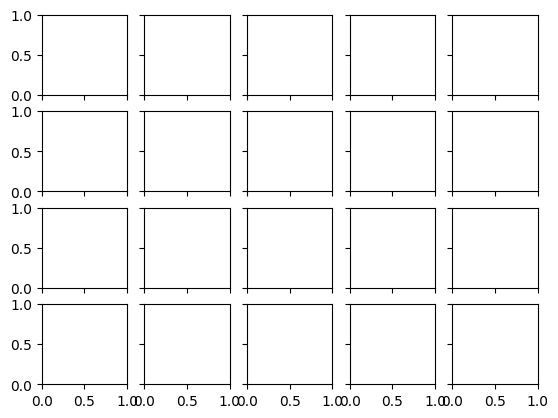

In [ ]:
#Visualize os resultados da saída do conjunto de testes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def res_visual(n):
  #Faça predição no conjunto de testes new_model
  #print(final_opt_a)
  fig, ax = plt.subplots(nrows=int(n/5), ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:')
  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5)==0:
      print('\t')
  #Visualizando as imagens:
  img = x_test[i].reshape(28,28)
  ax[i].imshow(img, cmap='Greys', interpolation='nearest')
  plt.tight_layout('off')
  print('Primeias 20 imagens do conjunto de teste')
  plt.show()
  # Removed the unexpected indentation from the following lines
  for i in range(n):
    ax[i].imshow(x_test_raw[i], cmap='Greys')
res_visual(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	


TypeError: tight_layout() takes 0 positional arguments but 1 was given

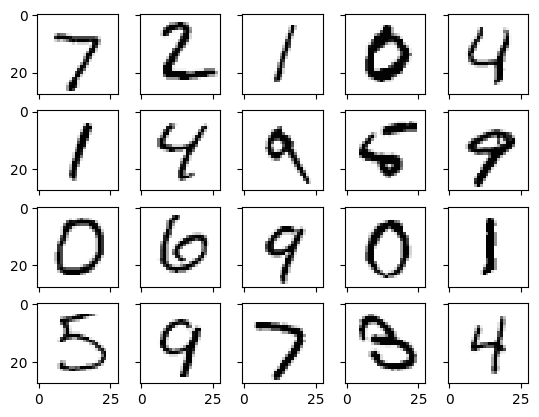

In [ ]:
#Visualize os resultados da saída do conjunto de testes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def res_visual(n):
  # Faça predição no conjunto de testes new_model
  final_opt_a = model.predict(x_test[:n]) # Predict on the first 'n' test samples

  fig, ax = plt.subplots(nrows=int(n/5), ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:')
  for i in range(n):
    print(np.argmax(final_opt_a[i]),end=',') # Print the predicted class index
    if int((i+1)%5)==0:
      print('\t')
  #Visualizando as imagens:
  for i in range(n):
    img = x_test[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
  plt.tight_layout('off')
  print('Primeias 20 imagens do conjunto de teste')
  plt.show()

  for i in range(n):
    ax[i].imshow(x_test_raw[i], cmap='Greys')

res_visual(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
Primeias 20 imagens do conjunto de teste


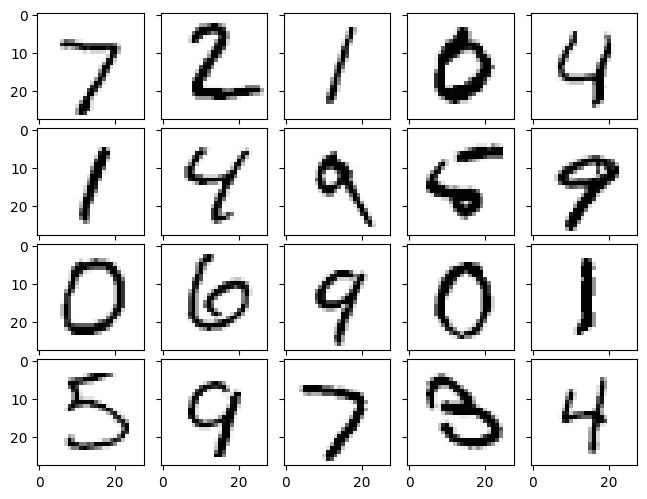

In [ ]:
#Visualize os resultados da saída do conjunto de testes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def res_visual(n):
  # Faça predição no conjunto de testes new_model
  final_opt_a = model.predict(x_test[:n]) # Predict on the first 'n' test samples

  fig, ax = plt.subplots(nrows=int(n/5), ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:')
  for i in range(n):
    print(np.argmax(final_opt_a[i]),end=',') # Print the predicted class index
    if int((i+1)%5)==0:
      print('\t')
  #Visualizando as imagens:
  for i in range(n):
    img = x_test[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
  plt.tight_layout(pad=0) # Use pad=0 to turn off tight_layout adjustments
  print('Primeias 20 imagens do conjunto de teste')
  plt.show()

  for i in range(n):
    ax[i].imshow(x_test_raw[i], cmap='Greys')

res_visual(20)

In [ ]:
#Visualize os resultados da saída do conjunto de testes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def res_visual(n, final_opt_a, x_test, x_test_raw): # Add parameters for necessary variables
  #Faça predição no conjunto de testes new_model
  #print(final_opt_a)
  fig, ax = plt.subplots(nrows=int(n/5), ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:')
  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5)==0:
      print('\t')
  #Visualizando as imagens:
  for i in range(n):
    img = x_test[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    # Removed the unexpected indentation from the following line and moved it into the loop
    ax[i].imshow(x_test_raw[i], cmap='Greys')
  plt.tight_layout('off')
  print('Primeias 20 imagens do conjunto de teste')
  plt.show()

# Assuming 'final_opt_a', 'x_test', and 'x_test_raw' are defined somewhere before calling res_visual
# Pass these variables as arguments when calling the function
res_visual(20, final_opt_a, x_test, x_test_raw)

NameError: name 'final_opt_a' is not defined

In [ ]:
#Visualize os resultados da saída do conjunto de testes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def res_visual(n, final_opt_a, x_test, x_test_raw): # Add parameters for necessary variables
  #Faça predição no conjunto de testes new_model
  #print(final_opt_a)
  fig, ax = plt.subplots(nrows=int(n/5), ncols=5, sharex=True, sharey=True)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste:')
  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5)==0:
      print('\t')
  #Visualizando as imagens:
  for i in range(n):
    img = x_test[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    # Removed the unexpected indentation from the following line and moved it into the loop
    ax[i].imshow(x_test_raw[i], cmap='Greys')
  plt.tight_layout('off')
  print('Primeias 20 imagens do conjunto de teste')
  plt.show()

# Define or import 'final_opt_a', 'x_test', and 'x_test_raw' before calling res_visual
# Example: Assuming these variables come from your test dataset
# final_opt_a = your_test_predictions
# x_test = your_

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
import matplotlib.pyplot as plt

# Assuming your model is compiled with the 'accuracy' metric
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
# Assuming 'model' is your Keras model
model.compile(optimizer='your_optimizer',
              loss='your_loss_function',
              metrics=['accuracy'])  # Add 'accuracy' to the metrics list

# Re-train your model if needed
# ...

# Then plot the accuracy curves
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

ValueError: Could not interpret optimizer identifier: your_optimizer

In [ ]:
# Assuming 'model' is your Keras model
model.compile(optimizer='adam',  # Replace 'your_optimizer' with a valid optimizer like 'adam'
              loss='your_loss_function',
              metrics=['accuracy'])  # Add 'accuracy' to the metrics list

# Re-train your model if needed
# ...

# Then plot the accuracy curves
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
# Assuming 'model' is your Keras model

# Train your model and store the training history
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10) # Replace x_train, y_train, x_val, y_val and epochs with your actual data and number of epochs

import matplotlib.pyplot as plt

# Now you can use the 'history' object
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show()

NameError: name 'x_val' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is a trained Keras/TensorFlow model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) # Replace with your actual training data and parameters

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show

Epoch 1/10


ValueError: Could not interpret loss identifier: your_loss_function

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is a trained Keras/TensorFlow model
# Replace 'categorical_crossentropy' with the appropriate loss function for your task
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), loss='categorical_crossentropy') # Replace with your actual training data and parameters

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show() # Call the show function to display the plot

TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'loss'

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is your compiled Keras model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) # Replace with your actual training data and parameters

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show() # Call the show function to display the plot

Epoch 1/10


ValueError: Could not interpret loss identifier: your_loss_function

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9899 - loss: 0.0541 - val_accuracy: 0.9890 - val_loss: 0.0546
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0375 - val_accuracy: 0.9886 - val_loss: 0.0681
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0341 - val_accuracy: 0.9900 - val_loss: 0.0665
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9923 - loss: 0.0328 - val_accuracy: 0.9883 - val_loss: 0.0691
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9916 - loss: 0.0387 - val_accuracy: 0.9890 - val_loss: 0.0640
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0446 - val_accuracy: 0.9902 - val_loss: 0.0714
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9918 - loss: 0.0349 - val_accuracy: 0.9888 - val_loss: 0.0634
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9917 - loss: 0.03

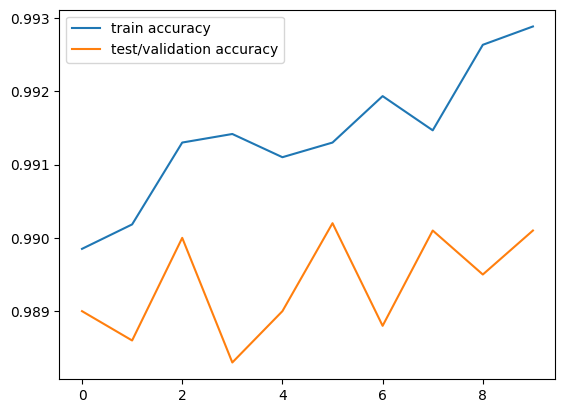

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy # Assuming you are doing classification

# Assuming 'model' is your Keras model
# Compile the model with a loss function, optimizer, and metrics
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) # Replace with your actual training data and parameters

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test/validation accuracy')
plt.legend()
plt.show() # Call the show function to display the plot

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.058259814977645874
Test accuracy: 0.9901000261306763


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model=keras.Sequential() #Crie a sequência da rede.
## Adicione a primeira camada convolucional e camada de pooling.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1), padding = 'same',activation = tf.nn.relu,input_shape = (28,2)))

model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Adicione a segunda camada convolucional e camada de pooling.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same', activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Adicione uma camada de eliminação para reduzir o sobreajuste.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
## Adicione duas camadas totalmente conectadas.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "conv2d_5" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model=keras.Sequential() #Crie a sequência da rede.
## Adicione a primeira camada convolucional e camada de pooling.
# Add channel dimension to input_shape, assuming it's 1 (grayscale)
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1), padding = 'same',activation = tf.nn.relu,input_shape = (28,2, 1)))

model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Adicione a segunda camada convolucional e camada de pooling.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same', activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Adicione uma camada de eliminação para reduzir o sobreajuste.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
## Adicione duas camadas totalmente conectadas.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

In [ ]:
# Expanda as dimensões dos dados para se adaptar ao modelo CNN.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=10,batch_size=128)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 0, but received input with shape (None, 3136)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=uint8)
  • training=True
  • mask=None

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.Sequential()
# Assuming your input images are 28x28 grayscale
model.add(keras.layers.Conv2D(filters=32,

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definindo o modelo
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Aqui é onde os dados são achatados
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Número de classes na saída
])

# Expanda as dimensões dos dados para se adaptar ao modelo CNN.
X_train = x_train.reshape(60000, 28, 28, 1)
X_test = x_test.reshape(10000, 28, 28, 1)

# Compilando o modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Treinando o modelo
model.fit(x=X_train, y=y_train, epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8659 - loss: 2.5352
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9773 - loss: 0.0783
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9859 - loss: 0.0428
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0254
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9950 - loss: 0.0159
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0220
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0181
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 - loss: 0.0134
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0155
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: 0.0153


In [ ]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9748 - loss: 0.1160
Test Accuracy 0.98


In [ ]:
model.save('./model/final_CNN2_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('./model/final_CNN_model.h5')
new_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,964 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Visualize os resultados de saída do conjunto de testes.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
final_opt_a=new_model.predict_classes(X_test[0:n])#Faça previsões no conjunto de teste
print(final_opt_a)
fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
ax = ax.flatten()
print('resultados de previsão das primeiras {} imagens:'.format(n))
for i in range(n):
print(final_opt_a[i],end=',')
if int((i+1)%5) ==0:
print('\t')
#Visualize a exibição da imagem.
img = X_test[i].reshape((28,28))#Leia cada linha de dados no formato da matriz (im
plt.axis("off")
ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualização
ax[i].axis("off")
print('primeiras {} imagens no conjunto de teste:'.format(n))
res_Visual(20)

IndentationError: expected an indented block after function definition on line 4 (<ipython-input-45-358ffde0288f>, line 5)

In [ ]:
#Visualize os resultados de saída do conjunto de testes.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    final_opt_a=new_model.predict_classes(X_test[0:n])#Faça previsões no conjunto de teste
    print(final_opt_a)
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('resultados de previsão das primeiras {} imagens:'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize a exibição da imagem.
        img = X_test[i].reshape((28,28))#Leia cada linha de dados no formato da matriz (im
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualização
        ax[i].axis("off")
    print('primeiras {} imagens no conjunto de teste:'.format(n))
res_Visual(20)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
resultados de previsão das primeiras 20 imagens:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
primeiras 20 imagens no conjunto de teste:


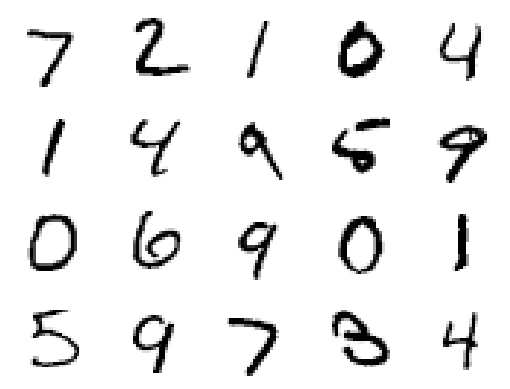

In [ ]:
#Visualize os resultados de saída do conjunto de testes.
import matplotlib.pyplot as plt
import numpy as np # Import numpy for argmax function
%matplotlib inline
def res_Visual(n):
    final_opt_a=np.argmax(new_model.predict(X_test[0:n]), axis=-1) # Use predict and argmax
    print(final_opt_a)
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('resultados de previsão das primeiras {} imagens:'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize a exibição da imagem.
        img = X_test[i].reshape((28,28))#Leia cada linha de dados no formato da matriz (im
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualização
        ax[i].axis("off")
    print('primeiras {} imagens no conjunto de teste:'.format(n))
res_Visual(20)